In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
from mpl_toolkits import mplot3d
from sklearn.linear_model import LogisticRegression

In [58]:
dfx = pd.read_csv('Logistic_X_Train.csv')
dfy = pd.read_csv('Logistic_y_Train.csv')
dft = pd.read_csv('Logistic_X_Test.csv')

In [83]:
lr = LogisticRegression()
lr.fit(dfx, dfy)
coeff = lr.coef_
bias = lr.intercept_
print (coeff, intercept)
print (lr.score(dfx, dfy))

[[-3.68470635  2.8811019  -2.24745975]] [-3.84066701]
0.995


C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [60]:
class_0=dfx.loc[(dfy['label']==0)]
class_1=dfx.loc[(dfy['label']==1)]

In [61]:
test_y = lr.predict(dft)
prediction = dft.loc[(test_y==0)]
prediction1 = dft.loc[(test_y==1)]
testy = pd.DataFrame(test_y)
testy

,0
0,1
1,1
2,0
3,1
4,1
...,...
995,0
996,0
997,1
998,1


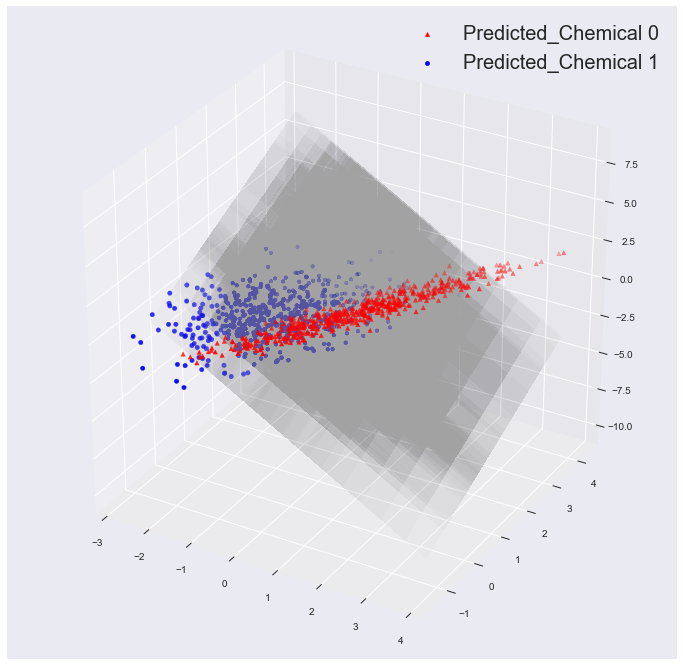

In [87]:
fig = plt.figure(figsize=(12,12))
ax=plt.axes(projection='3d')
ax.scatter3D(prediction['f1'],prediction['f2'],prediction['f3'],label='Predicted_Chemical 0',color='r',marker='^')
ax.scatter3D(prediction1['f1'],prediction1['f2'],prediction1['f3'],label='Predicted_Chemical 1',color='b')
x=dft['f1']
y=dft['f2']
xl, yl = np.meshgrid(x, y)
Z=-((coeff[0][1]*yl+coeff[0][0]*xl+intercept)/coeff[0][2])
ax.plot_surface(xl, yl, Z, alpha=0.01, color='white')
ax.legend(fontsize=20)


fig = plt.figure(figsize=(9,9))
ax=plt.axes(projection='3d')
ax.scatter3D(class_0['f1'], class_0['f2'], class_0['f3'], label='Chemical 0', color='r', marker=',')
ax.scatter3D(class_1['f1'], class_1['f2'], class_1['f3'], label='Chemical 1', color='b')
ax.plot_surface(xl, yl, Z, alpha=0.01, color='white')
ax.legend(fontsize=20)